In [3]:
import wave, struct, math # To calculate the WAV file content
from random import randint # To generate white noise
import numpy as np # To handle matrices
from PIL import Image # To open the input image and convert it to grayscale

import scipy                     # To plot the spectrogram
import matplotlib.pyplot as plt  # To plot the spectrogram
import scipy.io.wavfile          # To plot the spectrogram

In [4]:
def plotSpectrogram(file="sound.wav"):
    sample_rate, X = scipy.io.wavfile.read(file)
    plt.specgram(X, Fs=sample_rate, xextent=(0,60))
    print("File: ", file)
    print("Sample rate (Hz): ",sample_rate)

In [5]:
def plotMat(mat):
    mat = np.flip(mat,0)
    X, Y = np.meshgrid(range(mat.shape[0]), range(mat.shape[1]))
    Z = mat[X,Y]

    plt.pcolormesh(Y,X,Z)
    plt.show()

In [6]:
'''
    Creates a WAV file which spectrogram depicts lines at chosen frequencies
'''
def sumFreqs(freqs, file="sound.wav", duration=1.0, sampleRate=44100.0):
    # freqs is an array of frequencies in Hertz
    # file is the path to the wav file to output into
    # sampleRate in hertz
    # duration seconds

    wavef = wave.open(file,'w')
    wavef.setnchannels(1) # mono
    wavef.setsampwidth(2) 
    wavef.setframerate(sampleRate)

    max_frame = int(duration * sampleRate)
    for frame in range(max_frame):
        sumVal = 0
        countFreq = 0
        for freq in freqs:
            # Set the current frame value as the freq
            value = 32767.0*math.cos(freq * math.pi * float(frame) / float(sampleRate))
            sumVal += value
            countFreq += 1
        value = sumVal/countFreq
        # Short int, little endian
        data = struct.pack('<h', int(value))
        wavef.writeframesraw( data )
        
    wavef.writeframes(''.encode())
    wavef.close()

File:  sound.wav
Sample rate (Hz):  44100


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7176: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


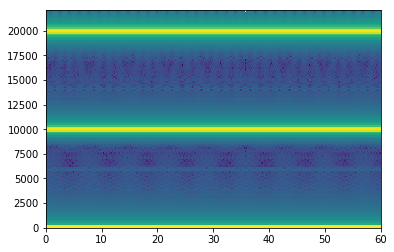

In [7]:
sumFreqs([x*2 for x in range(0,21000,10000)])
plotSpectrogram()

In [8]:
def pictMatToValueList(pictMat, duration=1.0, sampleRate=44100.0, min_freq=1, max_freq=22000):
    valueList = []
    
    max_amplitude = 32767
    max_frame = int(duration * sampleRate)
    
    freqMat = np.zeros((pictMat.shape[0],max_frame))
    # Match the frame index to the column of the picture
    frameToPict = []
    for i in range(pictMat.shape[1]):
        for _ in range(math.ceil(max_frame/pictMat.shape[1])):
            frameToPict.append(i)
    freqLevels = [max_freq/pictMat.shape[0]*i for i in range(pictMat.shape[0], 0, -1)]
    for frame in range(max_frame):
        sumVals = 0
        countVals = 0
        for row in range(pictMat.shape[0]):
            freq = freqLevels[row] # Strange bug, I need to multiply freq by two...
            # Map the freq to be in between min and max
            freq = freq * (max_freq-min_freq) / max_freq + min_freq
            freq *= 2
            
            col = frameToPict[frame]
            intensity = 1 - pictMat[row, col] # Between 0 and 1
            if intensity == 0:
                continue
            # Gets the signal's frequency right
            value = math.cos(freq * math.pi * float(frame) / float(sampleRate))
            # Gets the amplitude right
            value = intensity * max_amplitude * value
            sumVals += value
            countVals += 1
        # Avoid dividing by 0
        countVals = 1 if countVals == 0 else countVals
        value = int(sumVals/countVals)
        valueList.append(value)
    return valueList

In [9]:
def wavFromValueList(valueList, file="sound.wav", sampleRate=44100.0):
    # freqs is an array of frequencies in Hertz
    # file is the path to the wav file to output into
    # sampleRate in hertz
    # duration seconds

    wavef = wave.open(file,'w')
    wavef.setnchannels(1) # mono
    wavef.setsampwidth(2) 
    wavef.setframerate(sampleRate)

    for value in valueList:
        # Short int, little endian
        data = struct.pack('<h', value)
        wavef.writeframesraw( data )
        
    wavef.writeframes(''.encode())
    wavef.close()

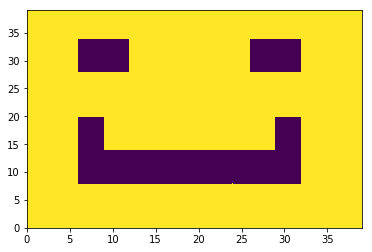

In [10]:
pictMat = np.array([
    [1,0,0,0,0,0,0],
    [0,1,0,0,0,1,0],
    [0,0,1,0,0,0,0],
    [0,0,0,1,0,0,0],
    [0,0,0,0,1,0,0],
    [0,0,0,0,0,1,0]
])
pictMat = np.array([
    [1,1,1,1,1,1,1],
    [0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0],
    [1,1,1,1,1,1,1],
    [0,0,0,0,0,0,0]
])
shapePict = 40
intensity = 1
pictMat = np.zeros((shapePict,shapePict))
pictMat[int(5/30*shapePict):int(9/30*shapePict),int(5/30*shapePict):int(9/30*shapePict)] = intensity
pictMat[int(5/30*shapePict):int(9/30*shapePict),int(20/30*shapePict):int(24/30*shapePict)] = intensity
pictMat[int(20/30*shapePict):int(24/30*shapePict),int(5/30*shapePict):int(24/30*shapePict)] = intensity
pictMat[int(15/30*shapePict):int(24/30*shapePict),int(5/30*shapePict):int(7/30*shapePict)] = intensity
pictMat[int(15/30*shapePict):int(24/30*shapePict),int(22/30*shapePict):int(24/30*shapePict)] = intensity
pictMat = 1 - pictMat
plotMat(pictMat)

In [11]:
valueList = pictMatToValueList(pictMat, duration=1)

In [12]:
wavFromValueList(valueList)

File:  sound.wav
Sample rate (Hz):  44100


/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:7176: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


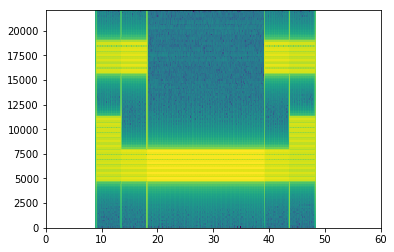

In [13]:
plotSpectrogram()

In [49]:
#img = Image.open("/home/sam1902/Pictures/graysalCanvas.png")
img = Image.open("/home/sam1902/Pictures/demonFace2.jpg")
#img = Image.open("demonFace.jpg")
img = img.convert("L")
print(img.size)
sizeFactor = 0.5
img = img.resize((int(img.size[0]*sizeFactor), int(img.size[1]*sizeFactor)))
print(img.size)
imgArr = np.array(img)
imgArr = imgArr/np.linalg.norm(imgArr)
# Gets close to 1, but doesn't get over
while np.max(imgArr) < 1:
    imgArr *= 1.1
imgArr /= 1.1
np.max(imgArr)

(1920, 1440)
(960, 720)


0.9154667636024304

In [52]:
valueList = pictMatToValueList(imgArr, duration=3, sampleRate=44100.0+10100)

File:  sound.wav
Sample rate (Hz):  44100


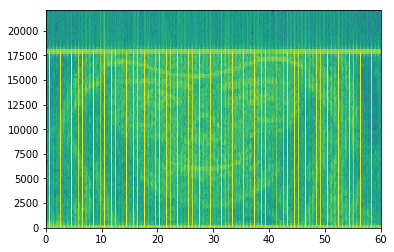

In [53]:
wavFromValueList(valueList)
plotSpectrogram()